## Observations and Insights 

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combine_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice.
combine_mouse_data["Mouse ID"].nunique()

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_by_mice = combine_mouse_data.groupby(["Mouse ID","Timepoint"])

group_by_mice.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 


249

In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Get all mice ID
AllMiceID = list(set(combine_mouse_data["Mouse ID"]))   #
# create dupMiceID list
dupMiceID = []
# loop all mice ID and genrate sub-dataframes for each mice ID, if duplicates exist, add the mice ID to dupMiceID
for id in AllMiceID:
    subdataframe = combine_mouse_data[combine_mouse_data["Mouse ID"]==id]
    if subdataframe['Timepoint'].duplicated().any():
        dupMiceID.append(id)


clean_combine_mouse_data = combine_mouse_data.copy()
        
# drop all rows with "Mice ID"=dupMiceID
for id in dupMiceID:
    indexNames = clean_combine_mouse_data[clean_combine_mouse_data['Mouse ID'] == id].index
    clean_combine_mouse_data.drop(indexNames , inplace=True)

clean_combine_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [51]:
# Checking the number of mice in the clean DataFrame.
clean_combine_mouse_data["Mouse ID"].nunique()

248

## Summary Statistics

In [153]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_group_df = clean_combine_mouse_data.groupby(["Drug Regimen"])['Tumor Volume (mm3)']

avg_regimen_group = pd.DataFrame(regimen_group_df.mean())
avg_regimen_group.reset_index(inplace=True)
avg_regimen_group.rename(columns = {'Tumor Volume (mm3)':'Average'}, inplace = True) 


median_regimen_group = pd.DataFrame(regimen_group_df.median())
median_regimen_group.reset_index(inplace=True)
median_regimen_group.rename(columns = {'Tumor Volume (mm3)':'Median'}, inplace = True) 

var_regimen_group = pd.DataFrame(regimen_group_df.var())
var_regimen_group.reset_index(inplace=True)
var_regimen_group.rename(columns = {'Tumor Volume (mm3)':'Variance'}, inplace = True) 

sd_regimen_group = pd.DataFrame(regimen_group_df.std())
sd_regimen_group.reset_index(inplace=True)
sd_regimen_group.rename(columns = {'Tumor Volume (mm3)':'STD'}, inplace = True) 

sem_regimen_group = pd.DataFrame(regimen_group_df.sem())
sem_regimen_group.reset_index(inplace=True)
sem_regimen_group.rename(columns = {'Tumor Volume (mm3)':'SEM'}, inplace = True) 

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


druglist = clean_combine_mouse_data['Drug Regimen'].unique()

Summary = pd.DataFrame({'Drug Regimen':druglist})

Summary = pd.merge(Summary, avg_regimen_group, on="Drug Regimen", how="left")
Summary = pd.merge(Summary, median_regimen_group, on="Drug Regimen", how="left")
Summary = pd.merge(Summary, var_regimen_group, on="Drug Regimen", how="left")
Summary = pd.merge(Summary, sd_regimen_group, on="Drug Regimen", how="left")
Summary = pd.merge(Summary, sem_regimen_group, on="Drug Regimen", how="left")

Summary = Summary.set_index("Drug Regimen")

Summary


,Average,Median,Variance,STD,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332


## Bar and Pie Charts

<BarContainer object of 10 artists>

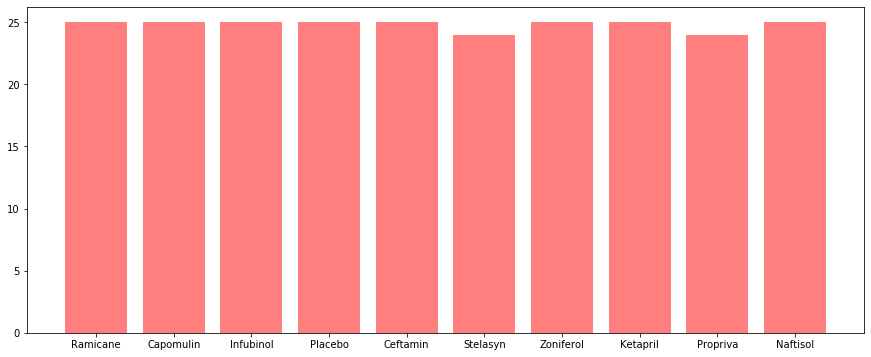

In [127]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# druglist name as x axis

# total mouse number as y axiss
nMice = np.zeros(len(druglist))

for id in range(nMice.size):
    drug = druglist[id]
    subdataframe = clean_combine_mouse_data[clean_combine_mouse_data["Drug Regimen"]==drug]
    nMice[id] = subdataframe['Mouse ID'].nunique()

fig = plt.figure(figsize=(15,6))
plt.bar(druglist, nMice, color='r', alpha=0.5, align='center')


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [152]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
newlist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
df = clean_combine_mouse_data.loc[clean_combine_mouse_data["Drug Regimen"].isin(newlist)]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newdf = df.drop_duplicates(['Mouse ID'], keep='last')
newdf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [144]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [145]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [146]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
